In [1]:
import pandas as pd

demographics_df = pd.read_csv('M1customer_demographics.csv')
demographics_df

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate,AgeGroup
0,9207fa75-5758-48d1-94ad-19c041e0520f,51.0,Female,Jensenberg,Low,2022-11-17,50-60
1,c139496e-cc89-498a-bd90-1fb4627b6cff,37.0,Male,Lake Jennifertown,NaN,2021-01-01,30-40
2,50118139-7264-428f-81cc-a25fddc5d6dd,44.0,Male,Port Carl,Medium,2024-06-10,40-50
3,7d1f2bbc-8d16-4fbc-9b37-ece3324e8ed4,50.0,Female,Jessebury,High,2023-08-24,50-60
4,2de49c7c-32ae-4ba8-b058-622a090d7094,53.0,Female,Emilyville,Low,2022-02-13,50-60
...,...,...,...,...,...,...,...
2807,40c2909d-983b-4c95-a737-2022acba98ee,28.0,Male,Josephborough,High,2020-02-14,20-30
2808,bbf7c36f-3745-4d3a-9e33-f927c2755f65,45.0,Female,Roberttown,Medium,2023-02-17,40-50
2809,0ef84cc6-0b4c-4c56-bdaa-d6b725ccc08e,40.0,Male,Lisaside,Medium,2022-07-23,40-50
2810,43ec68f5-4305-4b40-8ced-a187d00bb3f5,26.0,Female,Carrilloport,Low,2022-09-26,20-30


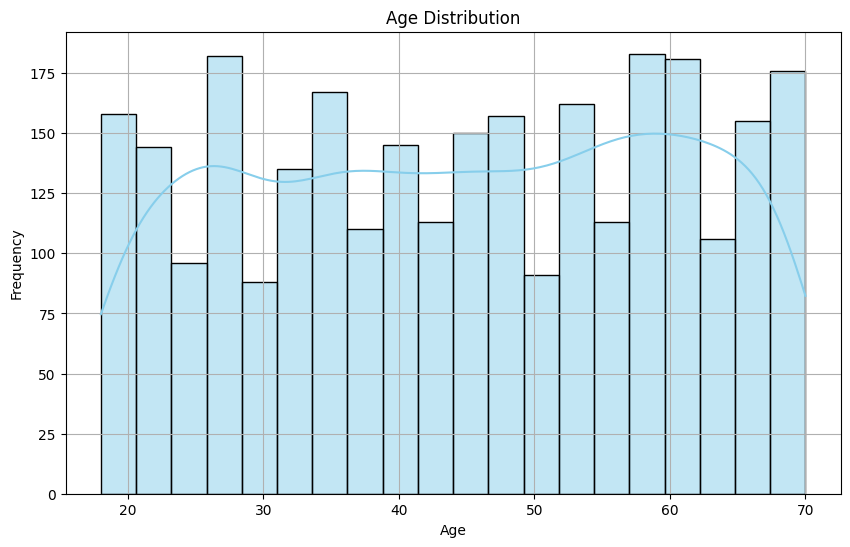

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(demographics_df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/tmp/ipykernel_189/2891113906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='AgeGroup', data=demographics_df, palette='viridis')


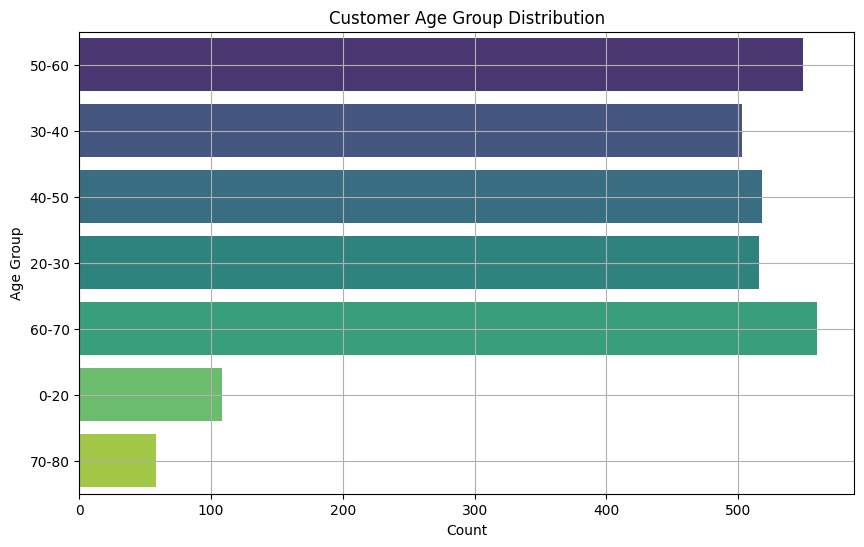

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(y='AgeGroup', data=demographics_df, palette='viridis')
plt.title('Customer Age Group Distribution')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.grid(True)
plt.show()

/tmp/ipykernel_189/3229252691.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='AgeGroup', data=demographics_df, order=age_group_order, palette='viridis')


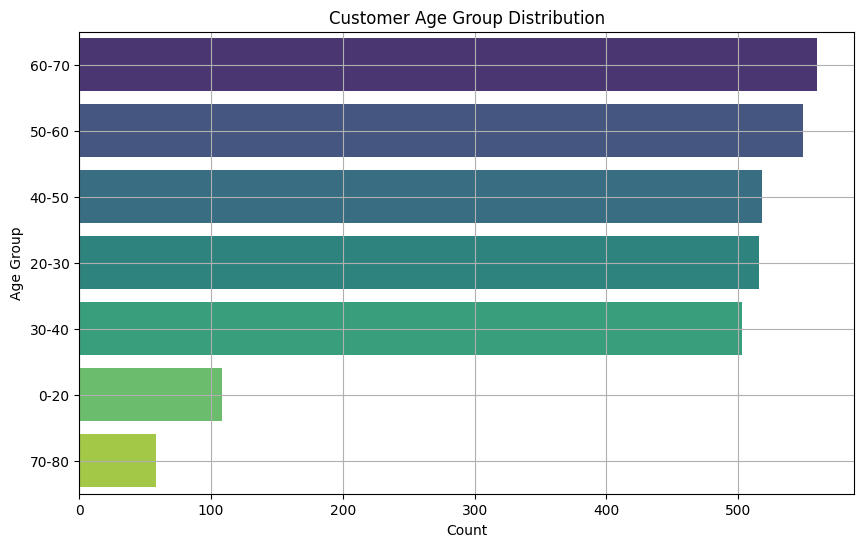

In [4]:
plt.figure(figsize=(10, 6))
# Sort the AgeGroup by count
age_group_order = demographics_df['AgeGroup'].value_counts().index
sns.countplot(y='AgeGroup', data=demographics_df, order=age_group_order, palette='viridis')
plt.title('Customer Age Group Distribution')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.grid(True)
plt.show()

In [6]:
# Calculate the age group distribution for each gender
age_gender_df = demographics_df.groupby('Gender')['AgeGroup'].value_counts().unstack().fillna(0)

# Calculate the percentage for each gender
age_gender_percentage = age_gender_df.div(age_gender_df.sum(axis=1), axis=0) * 100

age_gender_df, age_gender_percentage

(AgeGroup  0-20  20-30  30-40  40-50  50-60  60-70  70-80
 Gender                                                  
 Female      47    245    241    276    286    279     34
 Male        61    271    262    242    263    281     24,
 AgeGroup      0-20      20-30      30-40      40-50      50-60      60-70  \
 Gender                                                                      
 Female    3.338068  17.400568  17.116477  19.602273  20.312500  19.815341   
 Male      4.344729  19.301994  18.660969  17.236467  18.732194  20.014245   
 
 AgeGroup     70-80  
 Gender              
 Female    2.414773  
 Male      1.709402  )

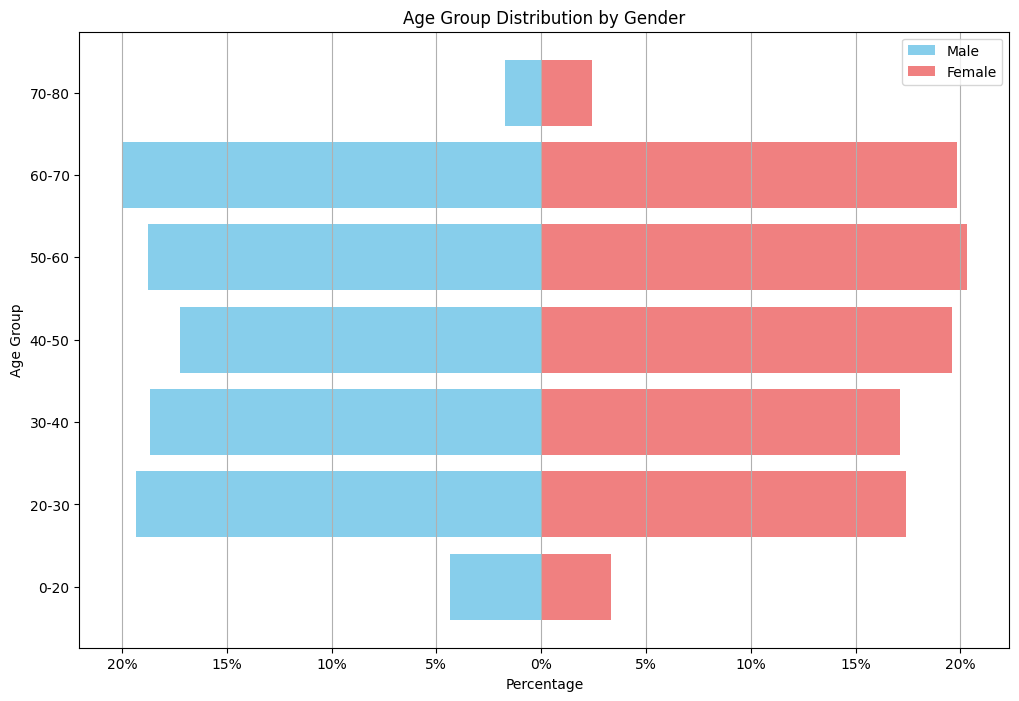

In [7]:
# Plotting the pyramid chart
plt.figure(figsize=(12, 8))

# Plotting Male data on the left
plt.barh(age_gender_percentage.columns, -age_gender_percentage.loc['Male'], color='skyblue', label='Male')

# Plotting Female data on the right
plt.barh(age_gender_percentage.columns, age_gender_percentage.loc['Female'], color='lightcoral', label='Female')

plt.title('Age Group Distribution by Gender')
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.xticks(ticks=[-20, -15, -10, -5, 0, 5, 10, 15, 20], labels=['20%', '15%', '10%', '5%', '0%', '5%', '10%', '15%', '20%'])
plt.legend(loc='upper right')
plt.grid(True, axis='x')
plt.show()

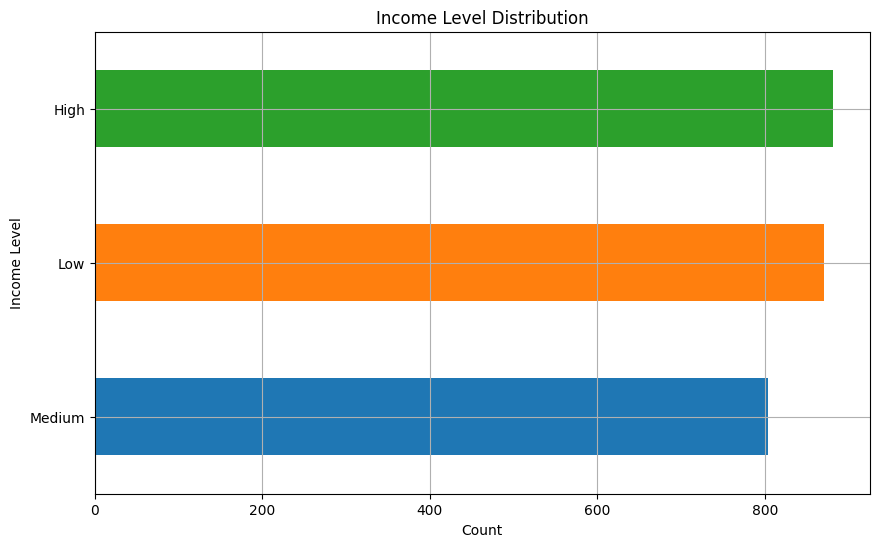

In [12]:
# Calculate the count of each income level
income_level_counts = demographics_df['IncomeLevel'].value_counts()

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Example colors
income_level_counts.sort_values(ascending=True).plot(kind='barh', color=colors)
plt.title('Income Level Distribution')
plt.xlabel('Count')
plt.ylabel('Income Level')
plt.grid(True)
plt.show()

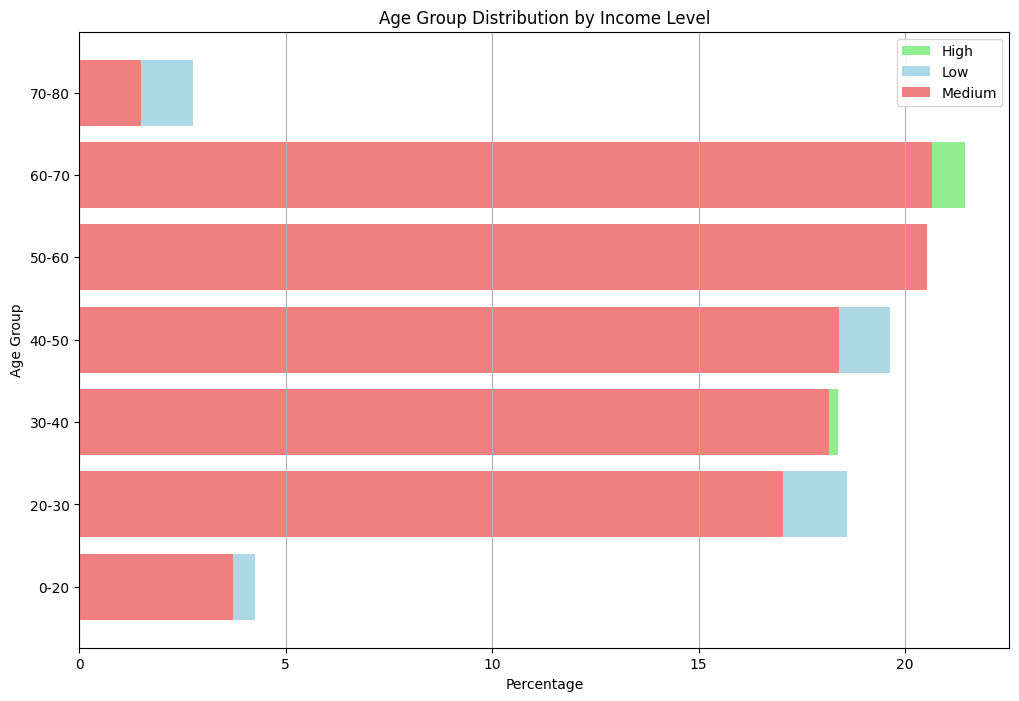

In [10]:
# Plotting the horizontal bar chart for age group distribution by income level
plt.figure(figsize=(12, 8))

# Plotting each income level
colors = ['lightgreen', 'lightblue', 'lightcoral']
for i, income_level in enumerate(age_income_percentage.index):
    plt.barh(age_income_percentage.columns, age_income_percentage.loc[income_level], 
             color=colors[i], label=income_level)

plt.title('Age Group Distribution by Income Level')
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.legend(loc='upper right')
plt.grid(True, axis='x')
plt.show()

<Figure size 1200x800 with 0 Axes>

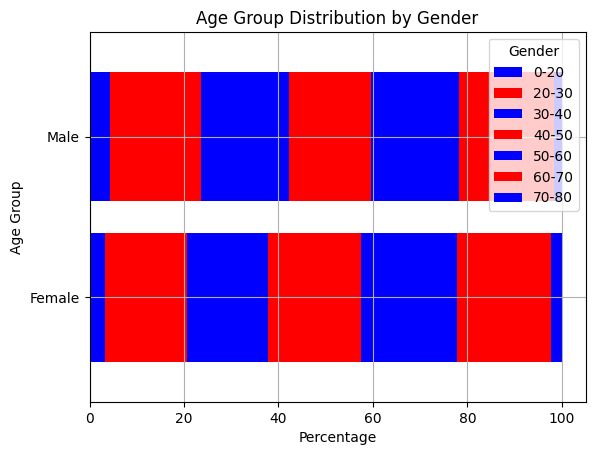

In [5]:
plt.figure(figsize=(12, 8))
# Create a new column for gender and age group combination
age_gender_df = demographics_df.groupby(['Gender', 'AgeGroup']).size().unstack()
# Normalize the data to get percentages
age_gender_percentage = age_gender_df.div(age_gender_df.sum(axis=1), axis=0) * 100
# Plot the data
age_gender_percentage.plot(kind='barh', stacked=True, color=['blue', 'red'], width=0.8)
plt.title('Age Group Distribution by Gender')
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.legend(title='Gender', loc='upper right')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

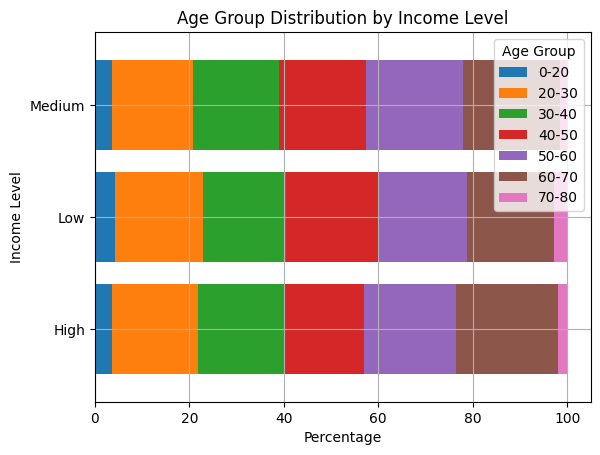

In [8]:
# Plotting the horizontal bar chart for Age Group Distribution by Income Level
plt.figure(figsize=(12, 8))

# Create a new column for income level and age group combination
age_income_df = demographics_df.groupby(['IncomeLevel', 'AgeGroup']).size().unstack()
# Normalize the data to get percentages
age_income_percentage = age_income_df.div(age_income_df.sum(axis=1), axis=0) * 100
# Plot the data
age_income_percentage.plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'], width=0.8)
plt.title('Age Group Distribution by Income Level')
plt.xlabel('Percentage')
plt.ylabel('Income Level')
plt.legend(title='Age Group', loc='upper right')
plt.grid(True)
plt.show()

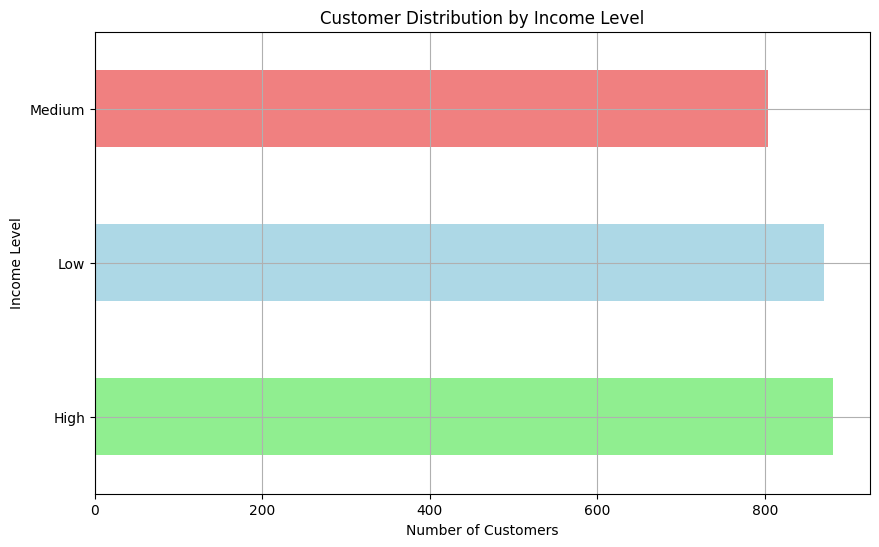

In [11]:
plt.figure(figsize=(10, 6))
# Count the number of customers in each income level
income_level_counts = demographics_df['IncomeLevel'].value_counts()
# Plot the horizontal bar chart
income_level_counts.plot(kind='barh', color=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Customer Distribution by Income Level')
plt.xlabel('Number of Customers')
plt.ylabel('Income Level')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

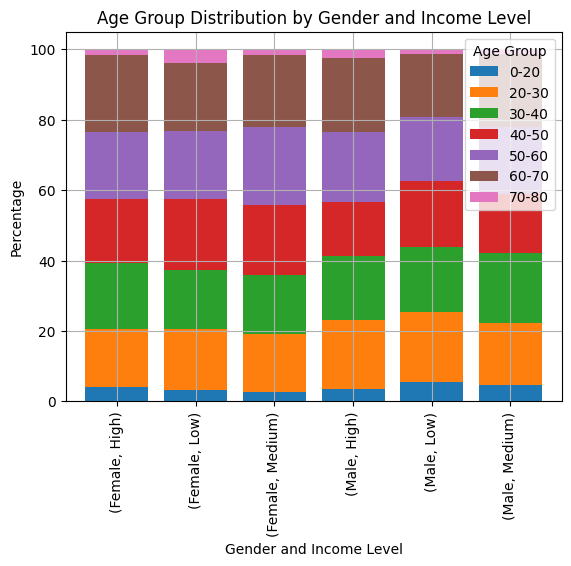

In [13]:
plt.figure(figsize=(12, 8))
# Create a new column for gender, income level, and age group combination
age_gender_income_df = demographics_df.groupby(['Gender', 'IncomeLevel', 'AgeGroup']).size().unstack().fillna(0)
# Normalize the data to get percentages
age_gender_income_percentage = age_gender_income_df.div(age_gender_income_df.sum(axis=1), axis=0) * 100
# Plot the data
age_gender_income_percentage.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'], width=0.8)
plt.title('Age Group Distribution by Gender and Income Level')
plt.xlabel('Gender and Income Level')
plt.ylabel('Percentage')
plt.legend(title='Age Group', loc='upper right')
plt.grid(True)
plt.show()

In [15]:
# Filter the demographics_df to get the top 10 most frequent combinations of Gender, IncomeLevel, and AgeGroup
most_frequent_combinations = demographics_df.groupby(['Gender', 'IncomeLevel', 'AgeGroup']).size().nlargest(10).reset_index(name='Count')
most_frequent_combinations

,Gender,IncomeLevel,AgeGroup,Count
0,Male,High,60-70,97
1,Female,High,60-70,92
2,Male,High,50-60,92
3,Female,Low,40-50,91
4,Male,High,20-30,91
5,Female,Medium,50-60,89
6,Female,Low,50-60,86
7,Female,Low,60-70,86
8,Male,Low,20-30,84
9,Male,Medium,60-70,84


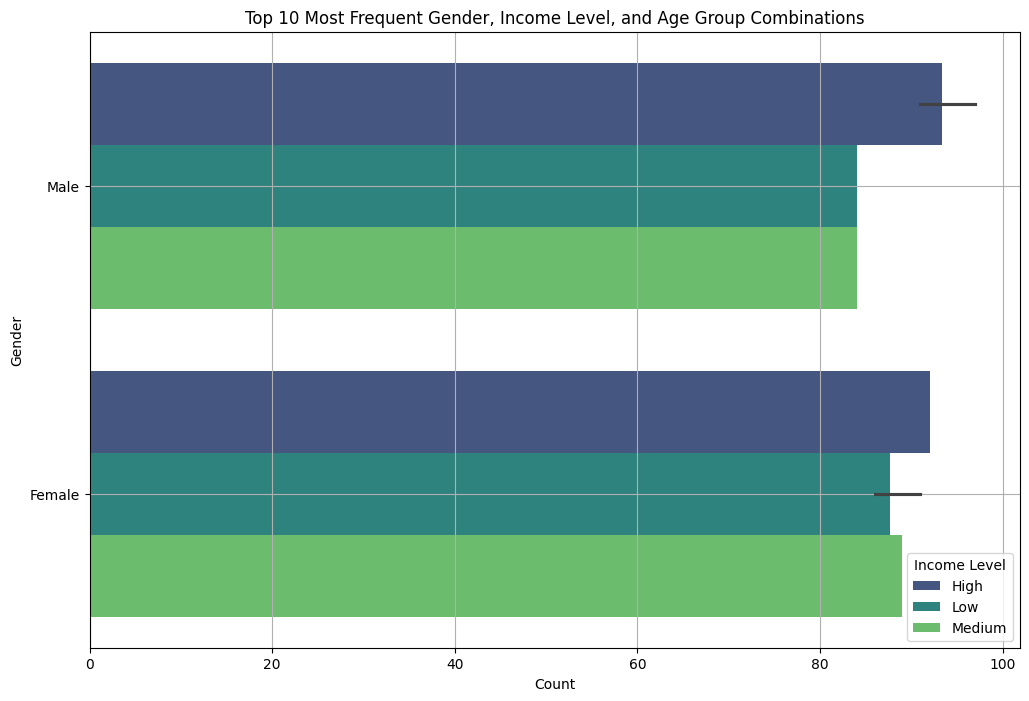

In [16]:
plt.figure(figsize=(12, 8))
# Plotting the top 10 most frequent combinations
sns.barplot(x='Count', y='Gender', hue='IncomeLevel', data=most_frequent_combinations, dodge=True, palette='viridis')
plt.title('Top 10 Most Frequent Gender, Income Level, and Age Group Combinations')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.legend(title='Income Level')
plt.grid(True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e501941b-aa01-4971-9d84-55fa3ef30f09' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>